In [31]:
from tensorflow.keras import layers, models
import numpy as np
import glob
import cv2 as cv
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
all_images = []
all_labels = []

for i , file in enumerate(glob.glob('train\**\**')) :
    label = file.split('\\')[-2]
    
    img = cv.imread(file)
    img = cv.resize(img , (28,28))
    img = img / 255.0
    
    all_images.append(img)
    all_labels.append(label)
    
    if i%100 == 0 : 
        print('[info] : 1000 images are processed...')
        
all_images = np.array(all_images)

[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...
[info] : 1000 images are processed...


In [25]:
LB = LabelBinarizer()
all_labels = LB.fit_transform(all_labels)

all_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [28]:
X_train , X_test , y_train , y_test = train_test_split(all_images , all_labels , test_size=0.2 ,random_state=120)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (952, 28, 28, 3)
X_test :  (238, 28, 28, 3)
y_train :  (952, 17)
y_test :  (238, 17)


In [29]:
model = models.Sequential([
    layers.Conv2D(16, (3,3) ,activation ='relu' , input_shape=(28, 28, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3) ,activation ='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3) ,activation ='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation ='relu'),
    layers.Dense(17,activation ='softmax')
])

model.compile(optimizer='sgd' ,loss = "categorical_crossentropy", metrics =['accuracy'])

In [30]:
history = model.fit(X_train ,y_train , validation_data=(X_test,y_test) , epochs=10, batch_size=32)

Epoch 1/10
30/30 [==============================] - 2s 27ms/step - loss: 2.8351 - accuracy: 0.0557 - val_loss: 2.8298 - val_accuracy: 0.0672
Epoch 2/10
30/30 [==============================] - 0s 15ms/step - loss: 2.8332 - accuracy: 0.0567 - val_loss: 2.8297 - val_accuracy: 0.0588
Epoch 3/10
30/30 [==============================] - 0s 14ms/step - loss: 2.8316 - accuracy: 0.0578 - val_loss: 2.8296 - val_accuracy: 0.0672
Epoch 4/10
30/30 [==============================] - 0s 14ms/step - loss: 2.8302 - accuracy: 0.0693 - val_loss: 2.8294 - val_accuracy: 0.0882
Epoch 5/10
30/30 [==============================] - 0s 15ms/step - loss: 2.8287 - accuracy: 0.0945 - val_loss: 2.8291 - val_accuracy: 0.1008
Epoch 6/10
30/30 [==============================] - 0s 14ms/step - loss: 2.8273 - accuracy: 0.0893 - val_loss: 2.8286 - val_accuracy: 0.0924
Epoch 7/10
30/30 [==============================] - 0s 14ms/step - loss: 2.8260 - accuracy: 0.1050 - val_loss: 2.8280 - val_accuracy: 0.0966
Epoch 8/10
30

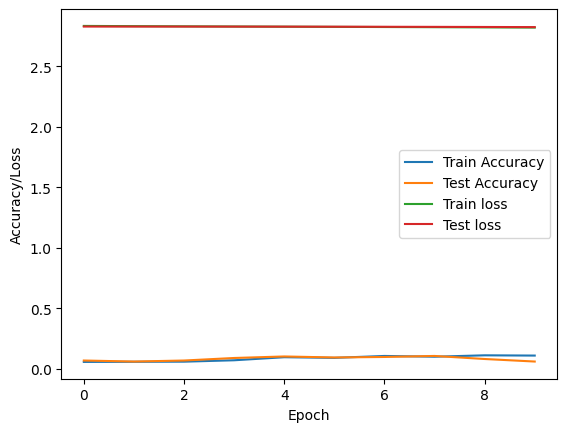

In [32]:
plt.plot(history.history['accuracy'] , label='Train Accuracy')
plt.plot(history.history['val_accuracy'] , label='Test Accuracy')

plt.plot(history.history['loss'] , label='Train loss')
plt.plot(history.history['val_loss'] , label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()